In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

sns.set_theme()

In [2]:
employment= pd.read_csv("emp.csv", encoding='latin-1')
employment.head()

/home/hashim/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""00000""",United States,,CAEMP25N,10.0,...,Total employment (number of jobs),Number of jobs,165522200,165095100,...,172901700,176091700,178979700,182325100,186233800,190325800,193378900,196337100,200284200,203809500
1,"""00000""",United States,,CAEMP25N,20.0,...,Wage and salary employment,Number of jobs,137334000,136301000,...,135393000,136918000,139619000,141932000,144722000,147641000,149913000,151892000,154365000,156445000
2,"""00000""",United States,,CAEMP25N,40.0,...,Proprietors employment,Number of jobs,28188200,28794100,...,37508700,39173700,39360700,40393100,41511800,42684800,43465900,44445100,45919200,47364500
3,"""00000""",United States,,CAEMP25N,50.0,...,Farm proprietors employment,Number of jobs,2190000,2032000,...,1882000,1876000,1844000,1856000,1840000,1834000,1824000,1803000,1792000,1787000
4,"""00000""",United States,,CAEMP25N,60.0,...,Nonfarm proprietors employment 2/,Number of jobs,25998200,26762100,...,35626700,37297700,37516700,38537100,39671800,40850800,41641900,42642100,44127200,45577500


In [3]:
columns = list(employment.columns)
new_columns = ["GeoName", "Description"] + columns[-20:]
new_columns

['GeoName',
 'Description',
 'Unit',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [4]:
df = employment[new_columns]
df.head(1)

,GeoName,Description,Unit,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,Total employment (number of jobs),Number of jobs,165522200,165095100,165921500,168839700,172338400,175868600,179543700,...,172901700,176091700,178979700,182325100,186233800,190325800,193378900,196337100,200284200,203809500


In [5]:
geos = df.query("GeoName == 'United States' and Description == 'Total employment (number of jobs)'")
geos = geos.T
geos = geos.iloc[3:]
geos[0] = pd.to_numeric(geos[0])
geos.reset_index(inplace=True)
geos.rename(columns = {'index':'Year', 0:'Total'}, inplace = True)

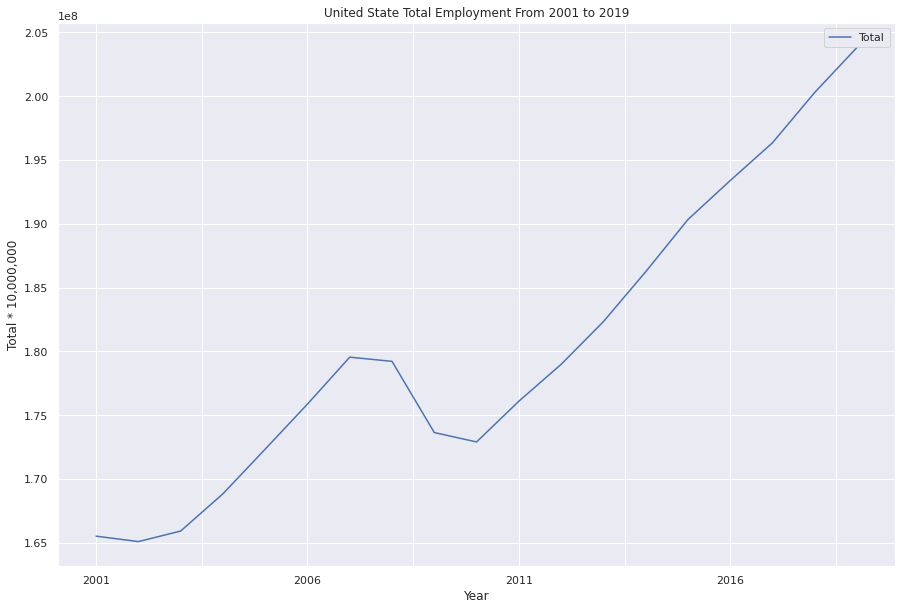

In [6]:
ax = geos.plot(
    figsize=(15, 10), 
    kind="line", x="Year", 
    y="Total", 
    ylabel="Total * 10,000,000", 
    title="United State Total Employment From 2001 to 2019",
)
ax.figure.savefig("test.png")

In [6]:
employment_rates = pd.read_excel("employmentrate2017.xlsx")
employment_rates

/home/hashim/anaconda3/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Area,White,Mixed,Indian,Pakistan/Bangladesh,Black/Black British,Other
0,Barking and Dagenham,69.6,74.5,68.4,59.7,73.8,61.0
1,Barnet,77.4,57.1,72.9,36.5,91.3,70.2
2,Bexley,75.2,75.7,76.8,56.3,78.9,76.6
3,Brent,77.1,71.1,71.9,55.7,57.5,63.2
4,Bromley,78.9,71.8,64.3,74.5,85.7,68.8
5,Camden,67.8,60.4,95.4,57.5,59.2,62.8
6,Croydon,77.4,78.1,73.6,68.7,67.6,69.1
7,Ealing,83.3,62.8,73.3,62.3,60.2,70.2
8,Enfield,69.2,58.0,80.2,57.3,68.7,65.9
9,Greenwich,76.6,75.4,75.4,72.9,61.7,73.8


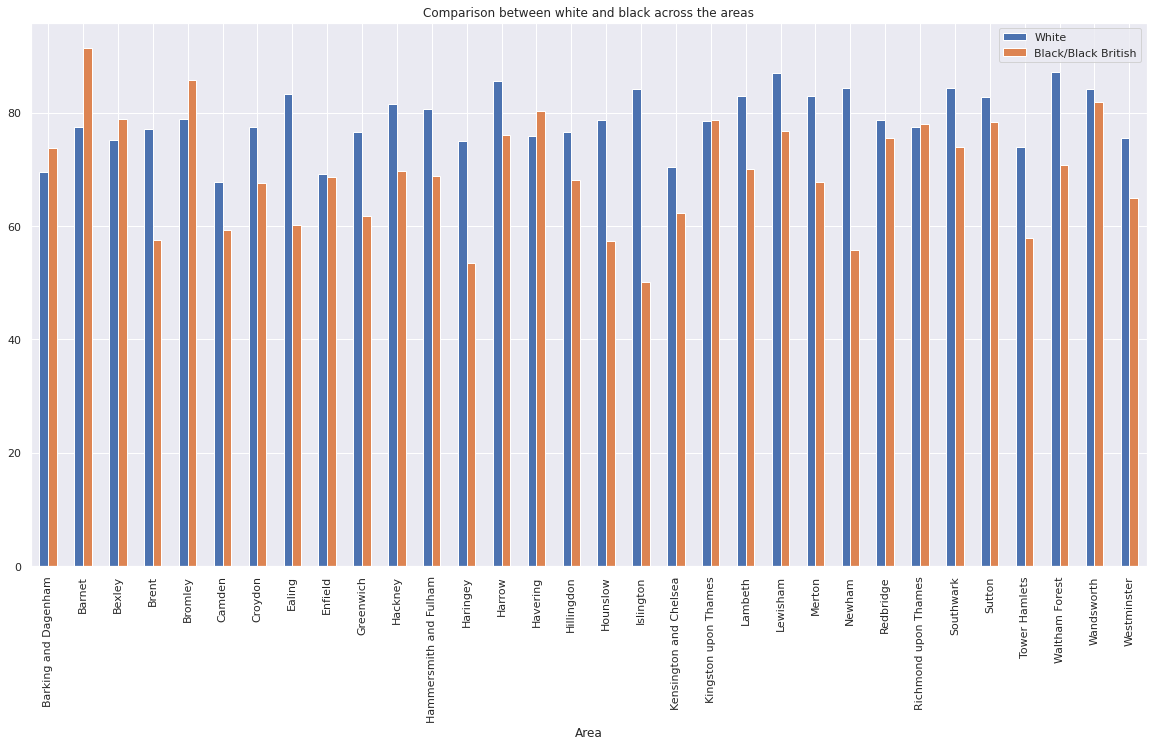

In [7]:
ax = employment_rates.plot(
    figsize=(20, 10), 
    x="Area", 
    y=["White", "Black/Black British"], 
    kind="bar",
    title="Comparison between white and black across the areas"
)
ax.figure.savefig("graph2.png")

In [ ]:
gss.head()